# **# CodeBasics Project - 1 : Introduction (Real Estate Price Prediction Project).ipynb**



Reference : https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb

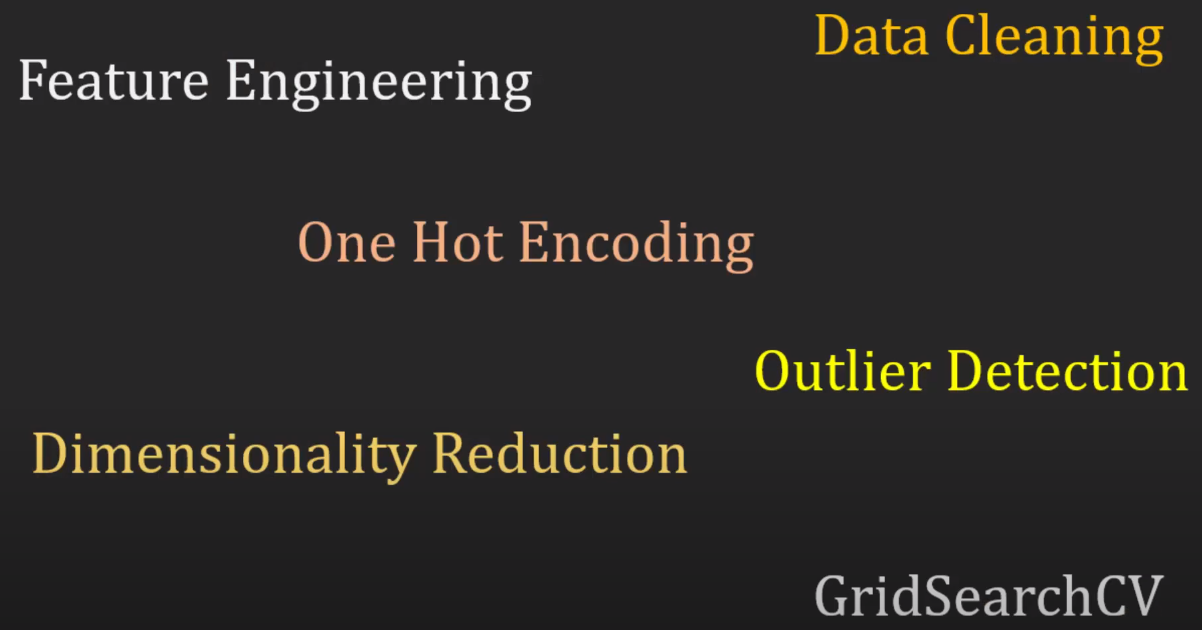

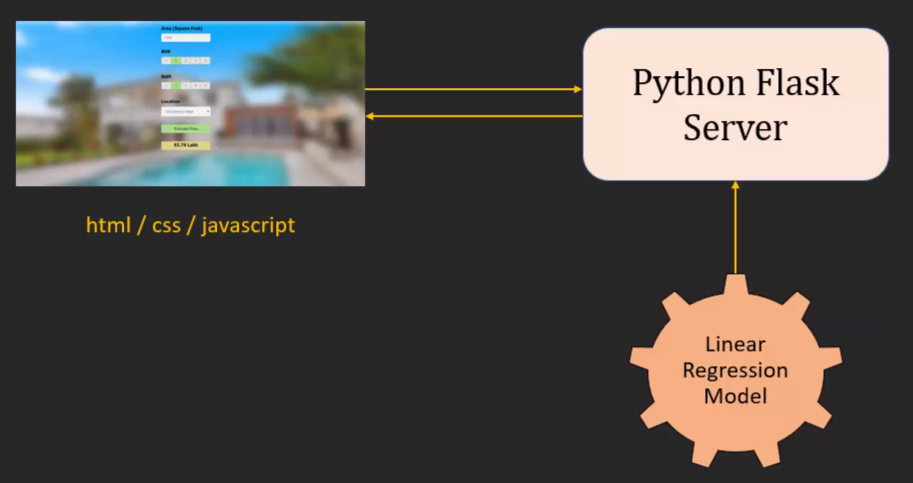

**Data Cleaning**

In [ ]:
import io
from google.colab import files

uploaded = files.upload()

Saving bengaluru_house_prices.csv to bengaluru_house_prices.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline          

In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['bengaluru_house_prices.csv']))
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df1.describe().unstack()

bath     count    13247.000000
         mean         2.692610
         std          1.341458
         min          1.000000
         25%          2.000000
         50%          2.000000
         75%          3.000000
         max         40.000000
balcony  count    12711.000000
         mean         1.584376
         std          0.817263
         min          0.000000
         25%          1.000000
         50%          2.000000
         75%          2.000000
         max          3.000000
price    count    13320.000000
         mean       112.565627
         std        148.971674
         min          8.000000
         25%         50.000000
         50%         72.000000
         75%        120.000000
         max       3600.000000
dtype: float64

In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df1['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

13 Imp Pandas functions:

https://www.analyticsvidhya.com/blog/2021/05/pandas-functions-13-most-important/

https://www.geeksforgeeks.org/python-pandas-dataframe-memory_usage/

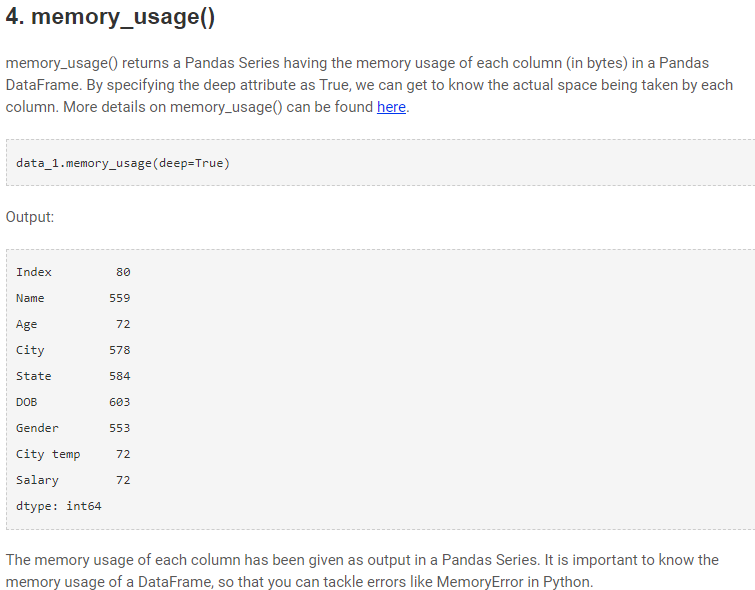

In [ ]:
# all the returned values are in Bytes
df1.memory_usage()

Index              128
area_type       106560
availability    106560
location        106560
size            106560
society         106560
total_sqft      106560
bath            106560
balcony         106560
price           106560
dtype: int64

In [ ]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df1['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Jun               1
16-Jan               1
14-Nov               1
16-Nov               1
16-Oct               1
Name: availability, Length: 81, dtype: int64

In [ ]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
avl = df1.groupby('availability')
avl.first()
#first is an MIT-licensed Python package with a simple function that returns the first true value from an iterable, or None if there is none. ... N.B. I'm using the term “true” consistently with Python docs for any() and all() — it means that the value evaluates to true like: True, 1, "foo", or [None].


,area_type,location,size,society,total_sqft,bath,balcony,price
availability,,,,,,,,
14-Jul,Built-up Area,Kumbena Agrahara,3 BHK,Shont F,1410,2.0,2.0,43.710
14-Nov,Built-up Area,Whitefield,3 BHK,None,1410,3.0,2.0,43.710
15-Aug,Built-up Area,Yelahanka,2 BHK,Velas V,1225,2.0,2.0,62.000
15-Dec,Built-up Area,1st Block Jayanagar,3 BHK,Bhsic C,1200,2.0,0.0,130.000
15-Jun,Built-up Area,Outer Ring Road East,3 BHK,SRzonhu,1500,2.0,0.0,97.000
...,...,...,...,...,...,...,...,...
22-Mar,Super built-up Area,Kanakapura,1 BHK,None,551,1.0,1.0,30.000
22-May,Super built-up Area,Jakkur,4 BHK,SoineC,3467.86,6.0,3.0,249.000
22-Nov,Super built-up Area,Devanahalli,3 BHK,Sabixtt,1498,3.0,3.0,79.150


In [ ]:
b = df1.groupby('bath').price.value_counts()
b

bath  price
1.0   35.0     28
      20.0     21
      25.0     20
      30.0     20
      40.0     19
               ..
16.0  490.0     1
      550.0     1
18.0  200.0     1
27.0  230.0     1
40.0  660.0     1
Name: price, Length: 2952, dtype: int64

In [ ]:
b.type()

AttributeError: ignored

In [ ]:
b1 = df1.groupby('bath')['price'].value_counts()
'''Can Also be written as : df1.groupby('bath').price.value_counts()

Concept : df.groupby returns a Dataframe. Again we are taking a specific column - ['Price']
of that dataframe and then applying other functions like a regular dataframe
'''
b1

bath  price
1.0   35.0     28
      20.0     21
      25.0     20
      30.0     20
      40.0     19
               ..
16.0  490.0     1
      550.0     1
18.0  200.0     1
27.0  230.0     1
40.0  660.0     1
Name: price, Length: 2952, dtype: int64

Now, the actual Project Begins

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt. ... matplotlibrc file, which you can read about in the Matplotlib documentation.

In [ ]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
# finding unique values of Feature - 'area_type'
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

How to Count Distinct Values of a Pandas Dataframe Column?

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

pandas.unique()

Dataframe.nunique()

Series.value_counts()

We are exploring the Feature - 'Area_Type' by various methods

In [ ]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
# check the values of 
# each row for each column
n = df1.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64


In [ ]:
# counting number unique values in each column
n1 = len(pd.unique(df1['area_type']))
  
print("No.of.unique values :", 
      n1)

No.of.unique values : 4


**Most Imp : Aggregation and grouping**

Python | Pandas Series.agg()

Pandas Series.agg() is used to pass a function or list of function to be applied on a series or even each element of series separately. In case of list of function, multiple results are returned by agg() method.


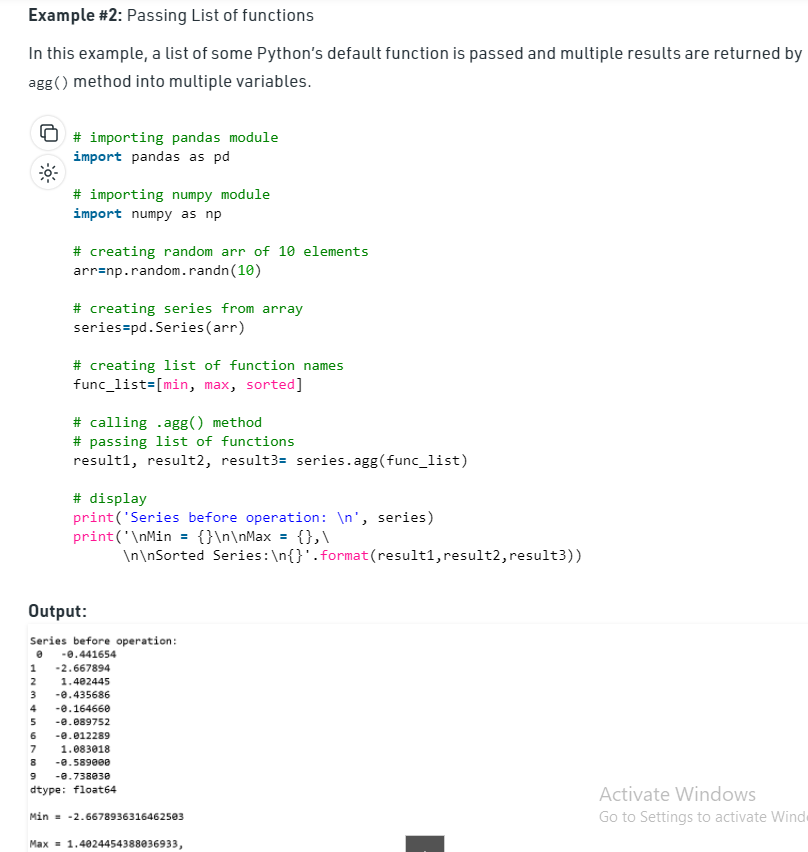

Aggregate can be used in Combination with Groupby and is used to apply some common functions like - count, mean ,median, max etc.

As shown in output above, multiple results were returned. Min, Max and Sorted array were returned into different variables result1, result2, result3 respectively.

Must Read Blogs on Aggregate functions :

https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [ ]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
# Another method by Aggregate method
# Getting count for all Columns

df1.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [ ]:

# Getting count for only Area_Type column

df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
# Dropping non relevant columns
df2 = df1.drop(['area_type','availability','society','balcony', 'price'],axis= 'columns')
df2.head()

,location,size,total_sqft,bath
0,Electronic City Phase II,2 BHK,1056,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0
2,Uttarahalli,3 BHK,1440,2.0
3,Lingadheeranahalli,3 BHK,1521,3.0
4,Kothanur,2 BHK,1200,2.0


In [ ]:
# Data Cleaning Function
# Know the NAN values

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
dtype: int64

In [ ]:
df2.shape

(13320, 4)

In [ ]:
# since the dataset has 13k rows so we can drop 73 rows else we might have to replace them
# with mean / median etc
# Thus you see all rows are dropped
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
dtype: int64

In [ ]:
# Here 3 out of 4 features are Object which will be converted later
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
dtypes: float64(1), object(3)
memory usage: 517.4+ KB


In [ ]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
# There are total 1304 locations with Whitefield as the most common one
df3.location.value_counts()

Whitefield              534
Sarjapur  Road          392
Electronic City         302
Kanakpura Road          266
Thanisandra             233
                       ... 
white field,kadugodi      1
Madanayakahalli           1
M.G Road                  1
Vayunandana Layout        1
Vittal Mallya Road        1
Name: location, Length: 1304, dtype: int64

**Feature Engineering**

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [ ]:
# Size contains some repetitive values - like 3 BHK and 3 bedroom is the same 
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# a function to Split the BHK value at space and then keep the 1,2,3 as the actual value
# We are creating a new feature
# My querry not running
df3['bhk'] = df3['size'].apply(lambda x in df3['size'].split() : x[0] )

SyntaxError: ignored

In [ ]:
# x.split(' ')[0] - means solit at space and take the first token [0]
# used int()- convert them into Integer since original value is String 
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,4
2,Uttarahalli,3 BHK,1440,2.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,3
4,Kothanur,2 BHK,1200,2.0,2


In [ ]:
# Now they are all integers
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,43


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
# we don't want these ranges - '1133 - 1384' as shown above
# First see what variations this feature has
# We use a Try/Except block for any error handling, any value which can't be converted to float
# will be returned as false
def is_float(x):
  try :
    float(x)
  except:
    return False
  return True


In [ ]:
df3['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [ ]:
# Used Apply function to apply any function to a Dataframe
# If we use df3[] also to the result of above it will return a Dataframe

df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,4
2,Uttarahalli,3 BHK,1440,2.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,3
4,Kothanur,2 BHK,1200,2.0,2
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,5
13316,Richards Town,4 BHK,3600,5.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,2
13318,Padmanabhanagar,4 BHK,4689,4.0,4


In [ ]:
# But above only gives Positive values but we are interested in Negative values so
# we will use Negate operator (~)
# It appears there are 10 such values
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,4
122,Hebbal,4 BHK,3067 - 8156,4.0,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,2
188,KR Puram,2 BHK,1015 - 1540,2.0,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,2
648,Arekere,9 Bedroom,4125Perch,9.0,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,4



Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple 

In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2 :
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None 


You could have also used a lambda function instead of the native pythin fuction above

In [ ]:
convert_sqft_to_num('1234')

1234.0

In [ ]:
convert_sqft_to_num('1234-1226')

1230.0

In [ ]:
# Didn't return anything which is expected
convert_sqft_to_num('1234SqFt')

In [ ]:
# Apply function on Feature
df4 = df3.copy()

In [ ]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4
2,Uttarahalli,3 BHK,1440.0,2.0,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3
4,Kothanur,2 BHK,1200.0,2.0,2


In [ ]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
bhk                   4
Name: 30, dtype: object


**Feature Engineering Techniques**

Add new feature called price per square feet : Since price/feet is an important feature in the market and will also help in outlier removal in later stages

In [ ]:
df5 = df4.copy()

In [ ]:
# Mistakely fropped price earlier so will include price again
df5['price'] = df1['price']
df5.head()

,location,size,total_sqft,bath,bhk,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,95.00
4,Kothanur,2 BHK,1200.0,2.0,2,51.00


In [ ]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head() 

,location,size,total_sqft,bath,bhk,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,2,51.00,4250.000000


In [ ]:

df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
# Exploring the Locations column
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
# Doing a count of above
len(df5.location.unique())

1304

In [ ]:
# 1304 locations is a big number, One hot encoding these Categorical values will result in a 
# lot of features around 1300 features this is called Dimentionality Curse so will have to
# Dimentionalty reduction
# First Strip off any kind of spaces from text column- Location
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats


Whitefield            535
Sarjapur  Road        392
Electronic City       304
Kanakpura Road        266
Thanisandra           236
                     ... 
Madanayakahalli         1
M.G Road                1
Vayunandana Layout      1
KPC Layout              1
Vittal Mallya Road      1
Name: location, Length: 1293, dtype: int64

In [ ]:
location_stats.values.sum()

13246

In [ ]:
len(location_stats[location_stats>10])

241

In [ ]:
len(location_stats)

1293

In [ ]:
len(location_stats[location_stats<=10])

1052

# **Dimensionality Reduction**

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Sadashiva Nagar       10
Nagadevanahalli       10
Ganga Nagar           10
Kalkere               10
Gunjur Palya          10
                      ..
Madanayakahalli        1
M.G Road               1
Vayunandana Layout     1
KPC Layout             1
Vittal Mallya Road     1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df5.location.unique())


1293

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,bhk,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,2,51.00,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,2,38.00,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,4,204.00,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,4,600.00,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,3,63.25,4828.244275
9,other,6 Bedroom,1020.0,6.0,6,370.00,36274.509804



# **Outlier Removal Using Business Logic**:

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [ ]:

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,bhk,price,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,6,370.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,8,200.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,6,150.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,8,85.0,6296.296296
70,other,3 Bedroom,500.0,3.0,3,100.0,20000.000000


In [ ]:
df5.shape


(13246, 7)

In [ ]:
# Negate operator ensures to drop all values below 300 
# This can be verified from the shape itself
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

## Outlier Removal Using Standard Deviation and Mean

# Must Read Articles

https://www.mathsisfun.com/data/standard-deviation.html

https://www.mathsisfun.com/data/standard-normal-distribution.html

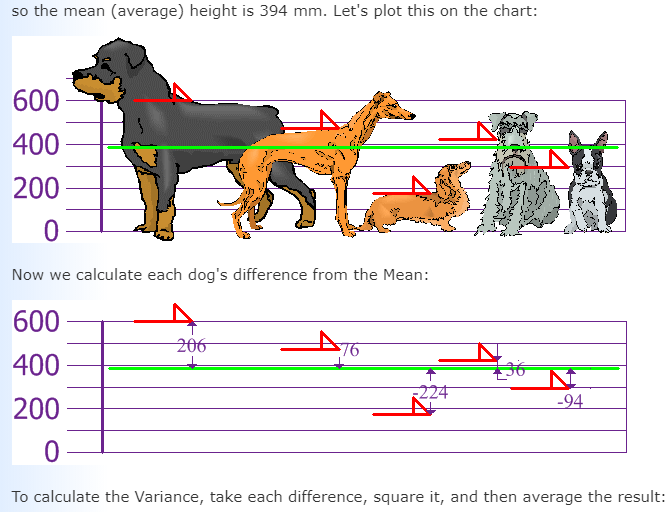

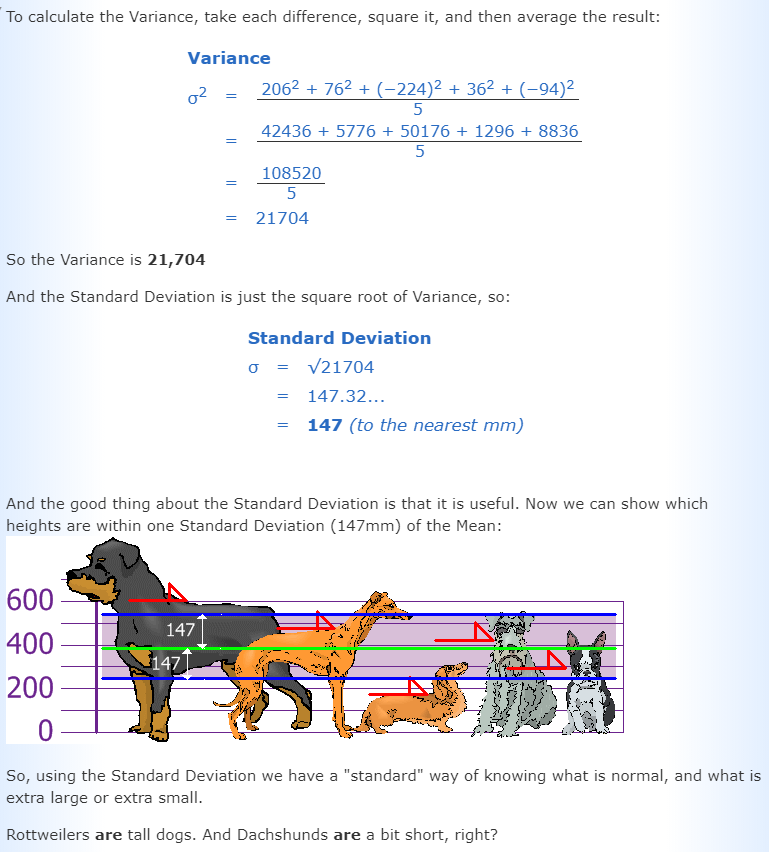

We are now going to analyse the Price per sq feet columns for the outliers

In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470.588235, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

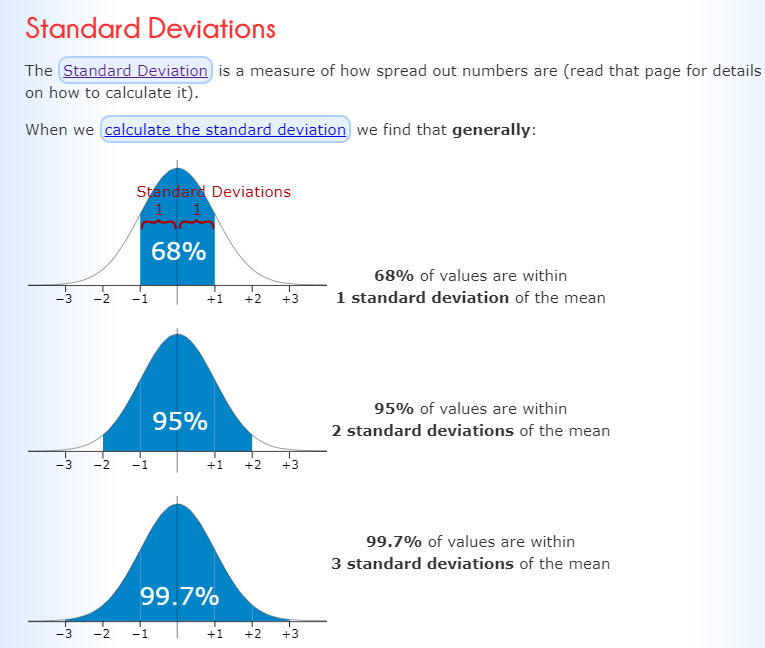

In [ ]:
# Remove everything after 1 Std Deviation 1 SD contains 68% of the samples assuming the data 
# is normally distributed

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

AttributeError: ignored

In [ ]:
 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape


(10241, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like



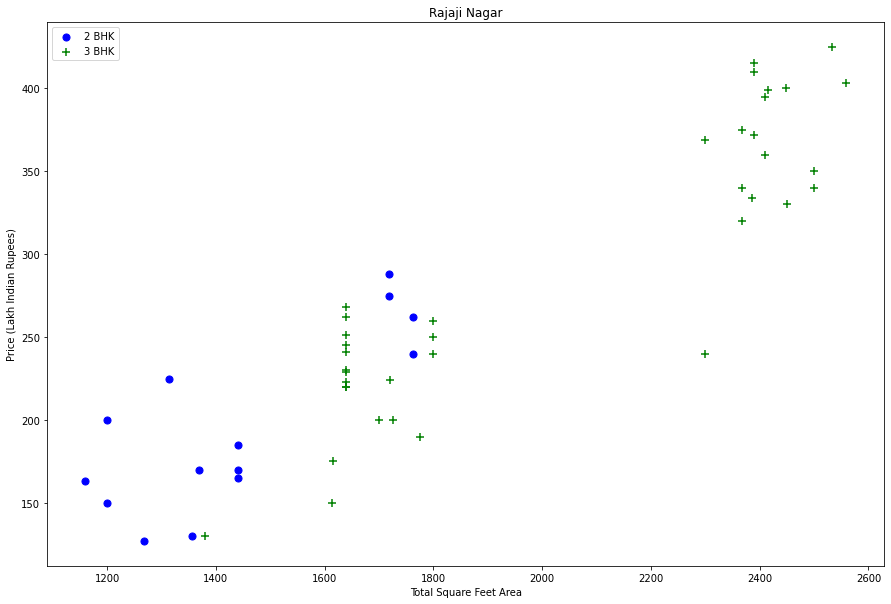

In [ ]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

# Below for same Area we have same prices for 2BHK and 3BHK which isn't ideal, thus those are outliers

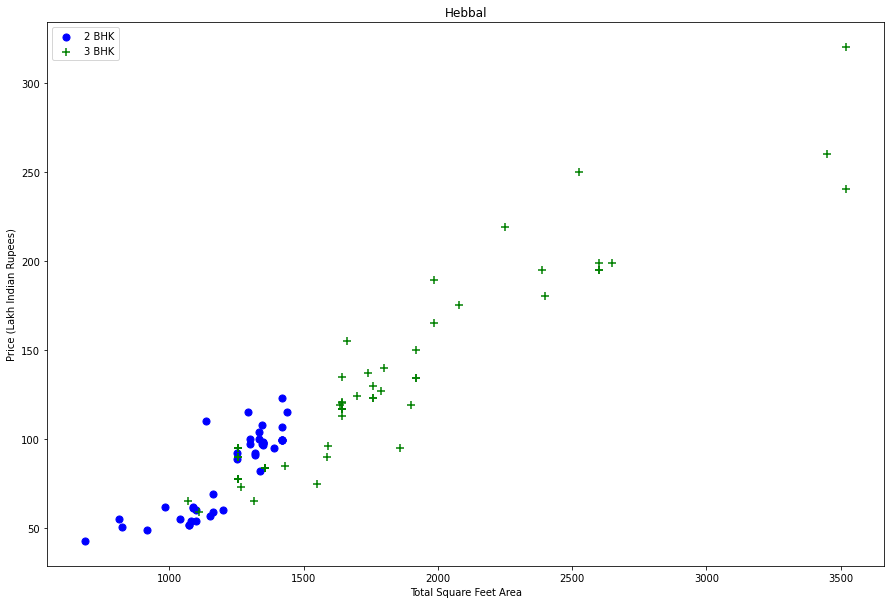

In [ ]:

plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

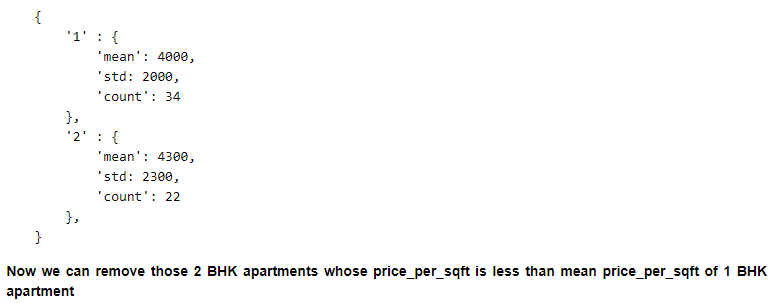

Explanation :

Inner for loop will iterate for every possible group of no. of bedrooms of that respective  location group. (of outer for loop)

First inner for loop will store information about mean , std and no of data points( no of values present in a group of bedroom) in the already created dictionary in the outer for loop with key as the respective bedroom no. group. i.e (bhk_stats[2] stores info about 2 bedroom group values)

Second inner for loop performs the main functionality,
stats = bhk_stats.get(bhk-1)
here it will fetch the value for the previous no. of bedroom group.

For example, for 1 bedroom group it will be None , as there is no possibe value stored for 0 bedroom group, simply because there is not any value like that in dataframe.
also for 3 bedroom group, it will fetch information about 2 bedroom group ( so that we can check the mean value )

if stats and stats['count']>5:
it checks if there is dictionary present ( we didn't have for 1 bedroom group ) because None value will throw error. It also checks if it has more than 5 values or not. Because we cannot decide to discard something without comparing it with substantial data values.

exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
this will finally store the index of the current bedroom group's element if it is lower than the previous bedroom's mean value..

then they are dropped
DONE !

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)


Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

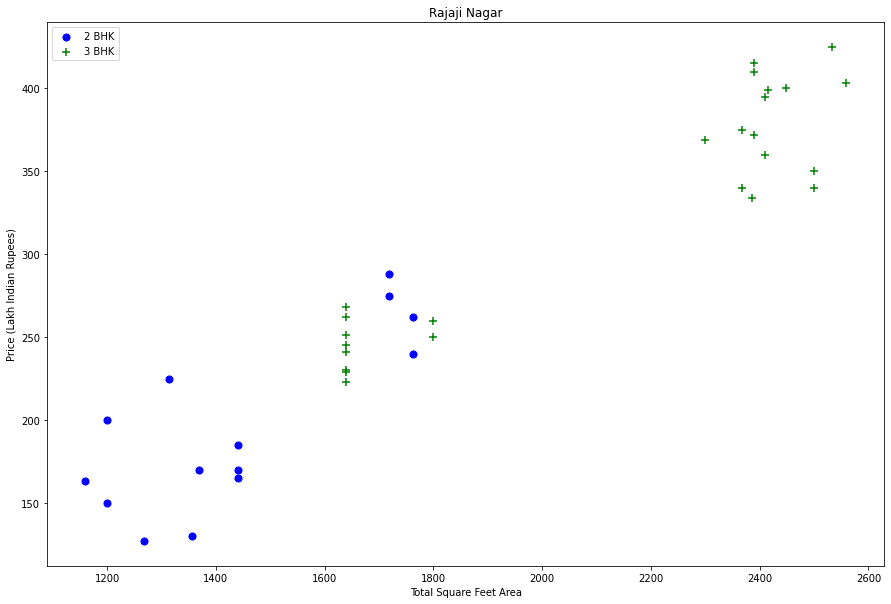

In [ ]:

plot_scatter_chart(df8,"Rajaji Nagar")

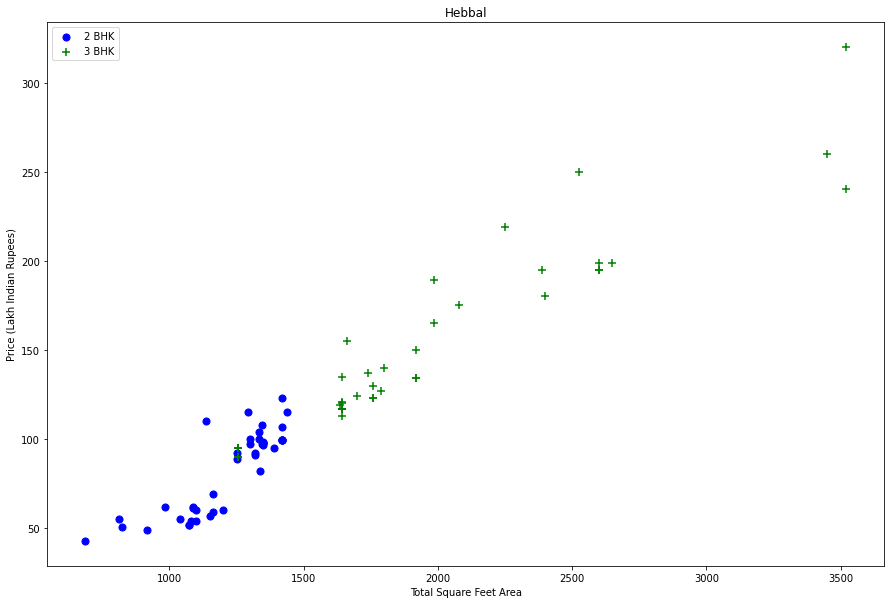

In [ ]:

plot_scatter_chart(df8,"Hebbal")

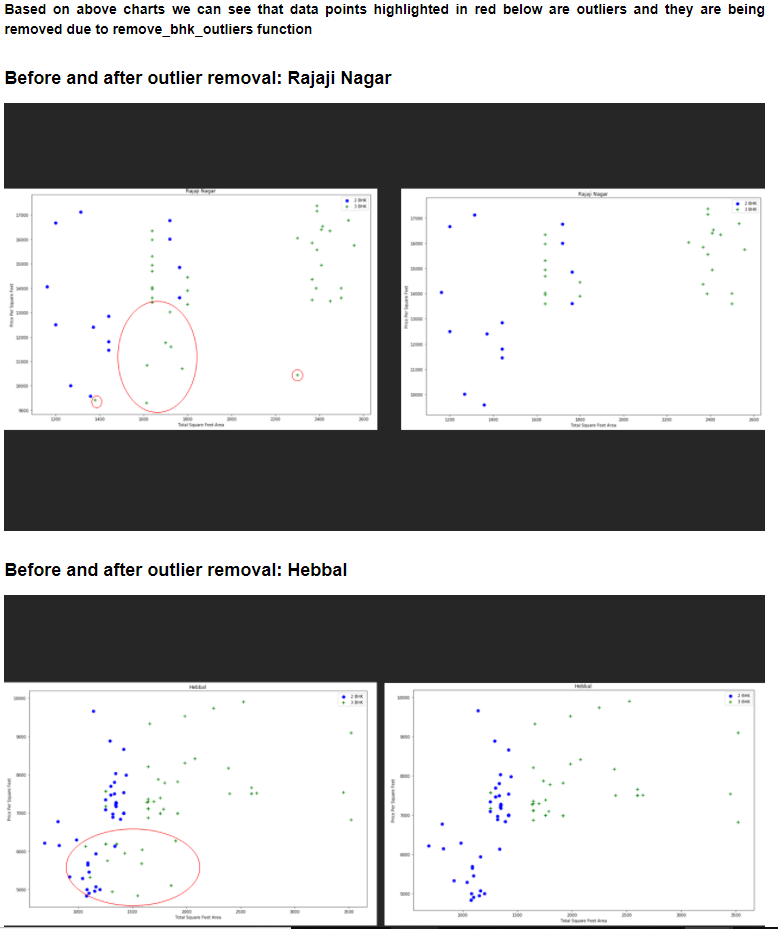

Text(0, 0.5, 'Count')

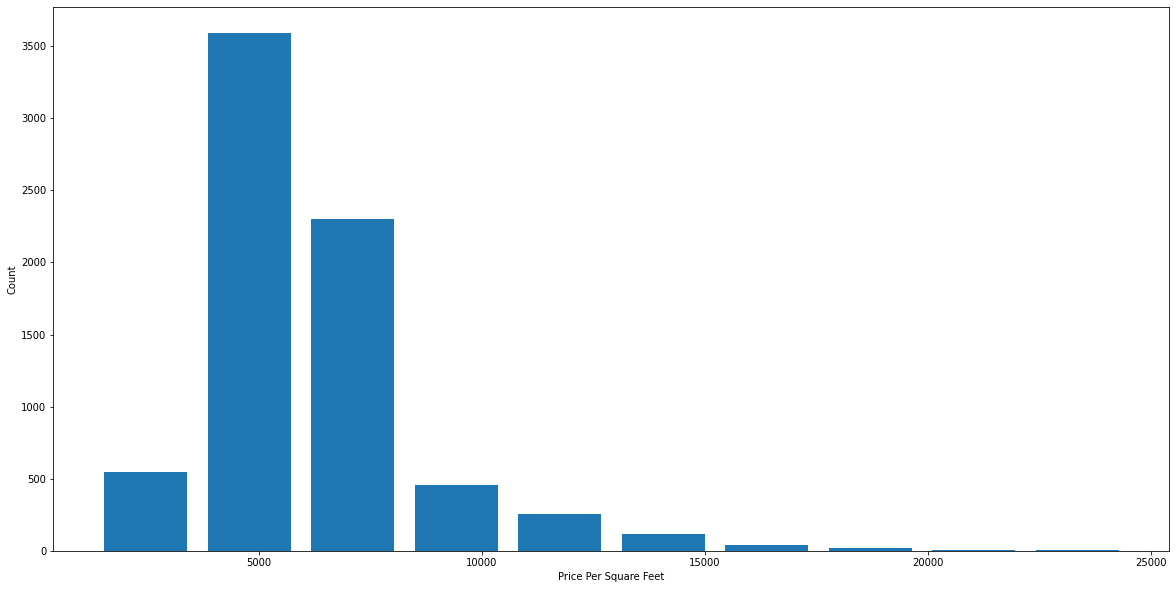

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [ ]:
df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

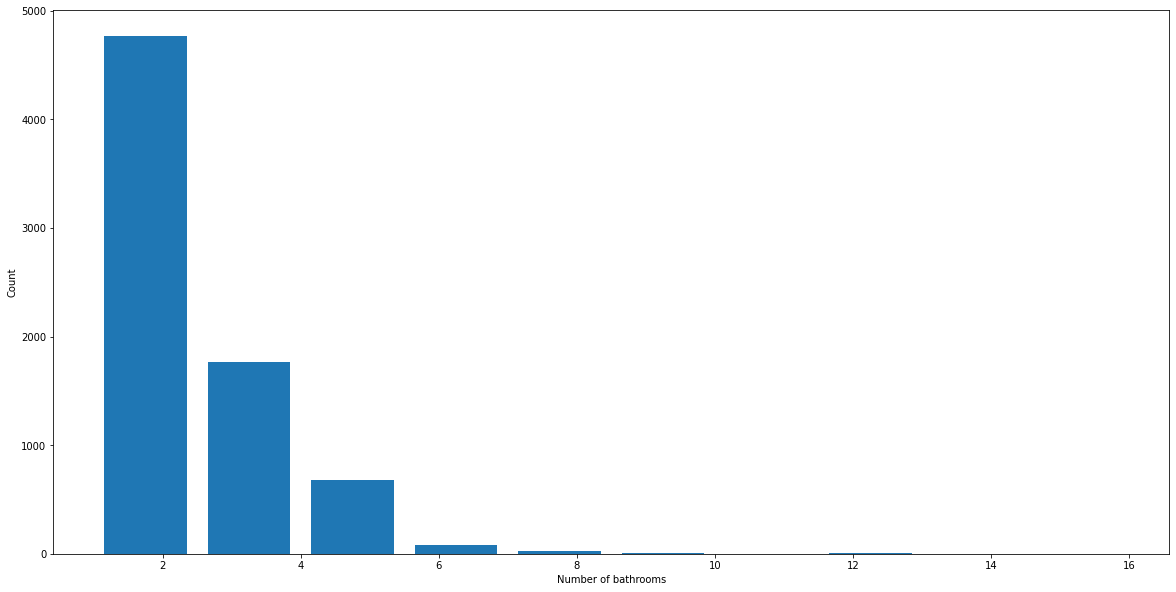

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>10]


,location,size,total_sqft,bath,bhk,price,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,10,160.0,4000.000000
8486,other,10 BHK,12000.0,12.0,10,525.0,4375.000000
8575,other,16 BHK,10000.0,16.0,16,550.0,5500.000000
9308,other,11 BHK,6000.0,12.0,11,150.0,2500.000000
9639,other,13 BHK,5425.0,13.0,13,275.0,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [ ]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,bhk,price,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,4,80.0,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,4,450.0,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,3,116.0,6423.034330
8411,other,6 BHK,11338.0,9.0,6,1000.0,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [ ]:
df9.head(2)


,location,size,total_sqft,bath,bhk,price,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,4,428.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,3,194.0,11901.840491


In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,bhk,price
0,1st Block Jayanagar,2850.0,4.0,4,428.0
1,1st Block Jayanagar,1630.0,3.0,3,194.0
2,1st Block Jayanagar,1875.0,2.0,3,235.0


# **Use One Hot Encoding For Location**

In [ ]:

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,428.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,3,194.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,235.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,3,130.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,148.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,428.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,194.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Build a Model Now...**

In [ ]:
df12.shape


(7251, 245)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(7251, 244)

In [ ]:

y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [ ]:
len(y)

7251

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874303

# **Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# **Find best model using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687507,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.717524,"{'criterion': 'mse', 'splitter': 'random'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

**Test the model for few properties**

Function to predict the Price :

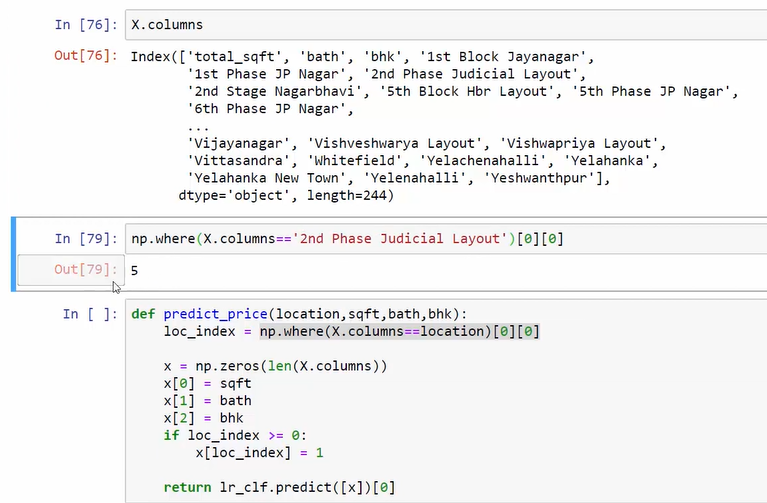

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677176957

In [ ]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519395203558

In [ ]:

predict_price('Indira Nagar',1000, 2, 2)

181.27815484006888

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

184.5843020203349


# Export the tested model to a pickle file 

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


**Export location and column information to a file that will be useful later on in our prediction application**

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))